<a href="https://colab.research.google.com/github/julianfvazquez/CH-DS-I/blob/main/ProyectoDS_ParteI_Vazquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📗 Abstract - Presentación proyecto
El presente proyecto tendrá por objeto el analísis de la información proveniente del dataset "Bank Customer Churn Prediction" publicado por Shubham Meshram en la plataforma digital Kaggle. El mencionado dataset contiene un registro de clientes pertenecientes a entidades bancarias en varios países de Europa, en el cual se describirán características propias de la relación del cliente con el banco por medio de la cual se intentará encontrar un patrón y predecir a aquellos actuales y futuros clientes que presentan mayor probalibidad de abandonar a su entidad bancaria.

El principal objetivo del proyecto será reconocer a partir del análisis de varias características claves de los clientes bancarios (como pueden ser la edad, ingresos estimados, la contratación o no de tarjeta de crédito, etc), crear un modelo que busque predecir cual es el tipo de cliente que con mayor probabilidad abandone a su entidad bancaria.
Este análisis exploratorio será útil para sentar una base sólida que nos permita también realizar labores de segmentación y la adopción de toda otra recomendación basada en el contenido obtenido del propio análisis.


---


# ❓Preguntas / Hipótesis de interés



1.   ¿Cuántos años en promedio pasa una persona como cliente antes de marchar?
2.   ¿A qué edad es más frecuente que un cliente abandone su entidad bancaria? ¿Es independiente de su sexo?
3.   ¿Existe una relación entre abandonar una entidad bancaria y su comportamiento comercial con el mismo? (saldo bancario, contratación de productos, posesión de tarjeta de crédito)
4.   ¿Cómo es el comportamiento de los clientes con el banco según sus ingresos estimados mensuales?




---

# 🔷Preprocesamiento de la información / ETL
A continuación, procederemos a realizar los pasos preliminares para la adaptación de nuestro Notebook para poder llevar a cabo nuestro proyecto. Importaremos las librerías necesarias, echaremos un vistazo preliminar a nuestro dataset, describiremos los datos que contiene y le haremos algunas modificaciones que creamos pertinentes para adaptarlo a un formato que permita optimizar nuestro análisis.










In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url_dataset = "https://raw.githubusercontent.com/julianfvazquez/CH-DS-I/refs/heads/Datasets/Churn_Modelling.csv"

In [4]:
dataset = pd.read_csv(url_dataset)

In [5]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


# 🖥Descripción de los campos de nuestro dataset
1. Customer ID: Valor único identificatorio de cada cliente
2. Surname: Apellido de cada uno de los clientes
3. Credit Score: valor numérico representativo del 'Credit Score' del cliente
4. Geography: País de residencia del cliente (France/Francia, Spain/España or Germany/Alemania)
5. Gender: Genéro del cliente (Male/Masculino or Female/Femenino)
6. Age: Edad del cliente.
7. Tenure: Antigüedad del cliente en el banco
8. Balance: Saldo de la cuenta bancaria del cliente
9. NumOfProducts: Número de productos que el cliente tiene contratados con el banco
10. HasCrCard: ¿Tiene el cliente tarjeta de crédito? (1 = yes, 0 = no)
11. IsActiveMember: ¿Es un cliente activo? (1 = yes, 0 = no)
12. EstimatedSalary: Ingresos estimados del cliente al año
13. Exited: ¿El cliente ha abandonado el banco? (1 = yes, 0 = no)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
dataset.shape

(10002, 14)

In [9]:
dataset.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,1
Gender,0
Age,1
Tenure,0
Balance,0
NumOfProducts,0




---


De acuerdo con esta primera observación de los datos, podemos remarcar algunas particularidades de nuestro Dataset:

1. Contamos con poco más de 10000 registros de clientes bancarios, que cuentan con 14 campos cada una de ellas.
2. Podemos observar que cada uno de los campos del dataset cuenta con un tipo de dato acorde al dato que el mismo intenta almacenar. Sin embargo, podemos observar que valores como la edad y otros campos que son del tipo binario tienen el tipo de dato 'float'. A esos campos, aplicaremos un cambio que se adapte mejor al tipo de datos que intentan representar, ya que la edad siempre será un número entero, y los campos binarios únicamente obtendrán valores de 1/0.
3. No existe un número significativo de registros con datos nulos. Es por ello, que se optará por eliminar dichos registros de nuestro dataset, ya que se puede apreciar que no afectará a nuestro futuro análisis su eliminación.
4. Poseemos datos como el número de fila, ID de cada cliente y su apellido que nada aportarán al análisis que intentaremos realizar.


---



In [10]:
dataset_copy = dataset.copy()

In [11]:
dataset_copy.dropna(inplace=True)
dataset_copy.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)

In [12]:
dataset_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


In [13]:
dataset_copy['Age'] = dataset_copy.Age.astype(int)
dataset_copy['HasCrCard'] = dataset_copy.HasCrCard.astype(int)
dataset_copy['IsActiveMember'] = dataset_copy.IsActiveMember.astype(int)

dataset_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


# 📊 EDA / Primeras visualizaciones

Conociendo la distribución de nuestros datos de acuerdo con algunas de las variables claves

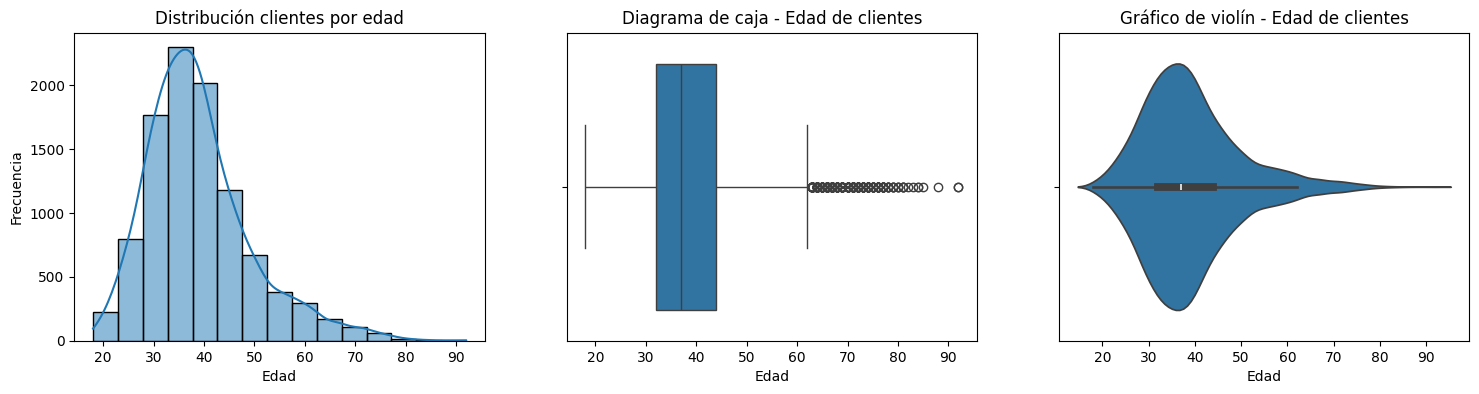

In [128]:
fig, ax = plt.subplots(1,3, figsize=(18,4))

ax01 = sns.histplot(dataset_copy.Age, bins=15, kde=True, ax=ax[0])
ax02 = sns.boxplot(dataset_copy, x='Age', ax=ax[1])
ax03 = sns.violinplot(dataset_copy, x='Age', ax=ax[2])


ax01.set_title('Distribución clientes por edad')
ax01.set_xlabel('Edad')
ax01.set_ylabel('Frecuencia')

ax02.set_title('Diagrama de caja - Edad de clientes')
ax02.set_xlabel('Edad')

ax03.set_title('Gráfico de violín - Edad de clientes')
ax03.set_xlabel('Edad')

plt.show()

In [44]:
edad_media = round(dataset_copy.Age.mean())
edad_mediana = round(dataset_copy.Age.median())
edad_moda = dataset_copy.Age.mode()

print(f'La edad promedio de los clientes es de: {edad_media} años')
print(f'La edad mediana de los clientes es de: {edad_mediana} años')
print(f'La edad que más se repite es de: {edad_moda[0]} años')

La edad promedio de los clientes es de: 39 años
La edad mediana de los clientes es de: 37 años
La edad que más se repite es de: 37 años


De acuerdo al primer análisis realizado a partir de la edad que poseen los clientes de bancos podemos observar que en principio la distribución de los clinetes de acuerdo con su edad presenta un sesgo hacia la derecha. Podemos ver como las 3 gráficas representadas de esta variable tienen la misma forma, la cual se puede apreciar obedece a valores extremos que son identificados en nuestro 'boxplot' como valores 'outliers'.
Analizando las medidas de tendencia central calculadas, podemos ver como esos valores atípicos son los que empujan a la media por encima de la mediana y la moda.




---



A continuación, procederemos a identificar cuales son esos valores atípicos para poder aislarlos de nuestro análisis y observar mejor nuestros registros sin su incidencia. Para ello, procederemos a realizar el procedimiento conocimo como Rango intercuartil.


In [45]:
dataset_no_outliers = dataset_copy.copy()

In [47]:
Q1 = dataset_no_outliers.Age.quantile(0.25)
Q3 = dataset_no_outliers.Age.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [55]:
dataset_no_outliers = dataset_no_outliers[(dataset_no_outliers.Age >= lower_bound) & (dataset_no_outliers.Age <= upper_bound)]

perdida_registros = round((dataset_copy.shape[0] - dataset_no_outliers.shape[0]) / dataset_copy.shape[0] * 100, 2)

print(f'Nuestro dataset original posee un total de {dataset_copy.shape[0]}.')
print(f'Luego de aplicar IQR, nuestro dataset tiene un total de {dataset_no_outliers.shape[0]}. Lo cual representa una reducción en los registros de un {perdida_registros}%.')


Nuestro dataset original posee un total de 9998.
Luego de aplicar IQR, nuestro dataset tiene un total de 9639. Lo cual representa una reducción en los registros de un 3.59%.


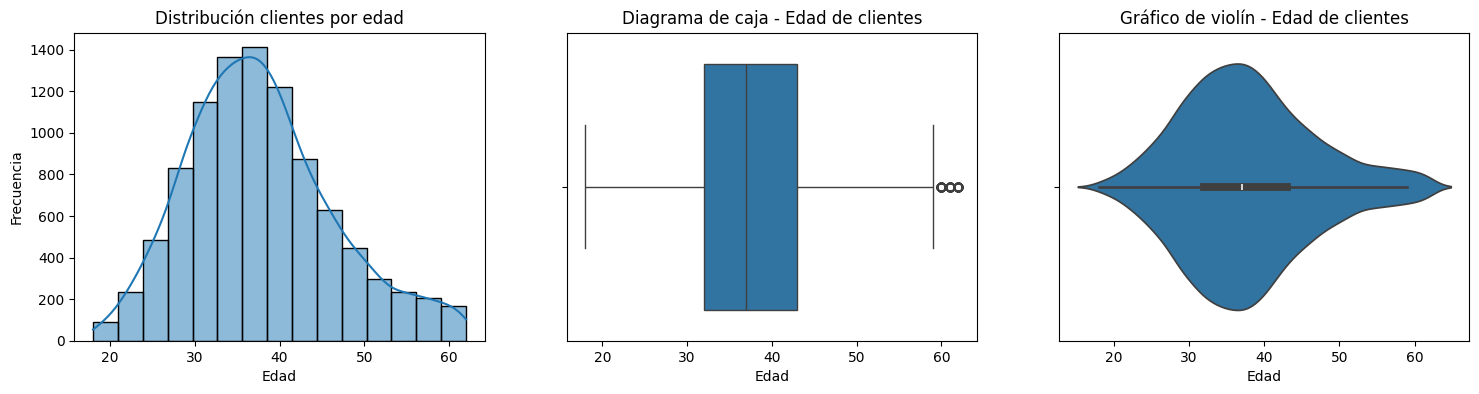

In [127]:
fig, ax = plt.subplots(1,3, figsize=(18,4))

ax01 = sns.histplot(dataset_no_outliers.Age, bins=15, kde=True, ax=ax[0])
ax02 = sns.boxplot(dataset_no_outliers, x='Age', ax=ax[1])
ax03 = sns.violinplot(dataset_no_outliers, x='Age', ax=ax[2])


ax01.set_title('Distribución clientes por edad')
ax01.set_xlabel('Edad')
ax01.set_ylabel('Frecuencia')

ax02.set_title('Diagrama de caja - Edad de clientes')
ax02.set_xlabel('Edad')

ax03.set_title('Gráfico de violín - Edad de clientes')
ax03.set_xlabel('Edad')

plt.show()

In [51]:
edad_media = round(dataset_no_outliers.Age.mean())
edad_mediana = round(dataset_no_outliers.Age.median())
edad_moda = dataset_no_outliers.Age.mode()

print(f'La edad promedio de los clientes es de: {edad_media} años')
print(f'La edad mediana de los clientes es de: {edad_mediana} años')
print(f'La edad que más se repite es de: {edad_moda[0]} años')

La edad promedio de los clientes es de: 38 años
La edad mediana de los clientes es de: 37 años
La edad que más se repite es de: 37 años


❗Como podemos observar, luego de la aplicación del método IQR, nuestra muestra es ahora más robusta e inclusive similar a la de una distribución normal. Las 3 medidas de tendencia cental calculadas se encuentran alineadas. Sin embargo, como podemos observar en nuestro nuevo 'boxplot', aún siguen identificándo algunos valores como atípicos, los cuales empujan a la media un poco por encima de nuestra mediana y moda.



---



🔍 Veamos ahora como se comporta nuestra variable 'Edad' para aquellos clientes que han decidido abandonar su entidad bancaria.

In [88]:
dataset_churn = dataset_no_outliers[dataset_no_outliers.Exited == 1]

In [108]:
edad_media_churn = round(dataset_churn.Age.mean())
edad_mediana_churn = round(dataset_churn.Age.median())
edad_moda_churn = dataset_churn.Age.mode()

print(f'La edad promedio de los clientes que han abandonado su banco es de: {edad_media_churn} años')
print(f'La edad mediana de los clientes que han abandonado su banco es de: {edad_mediana_churn} años')
print(f'La edad que más se repite es de: {edad_moda_churn[0]} años')

La edad promedio de los clientes que han abandonado su banco es de: 44 años
La edad mediana de los clientes que han abandonado su banco es de: 44 años
La edad que más se repite es de: 46 años


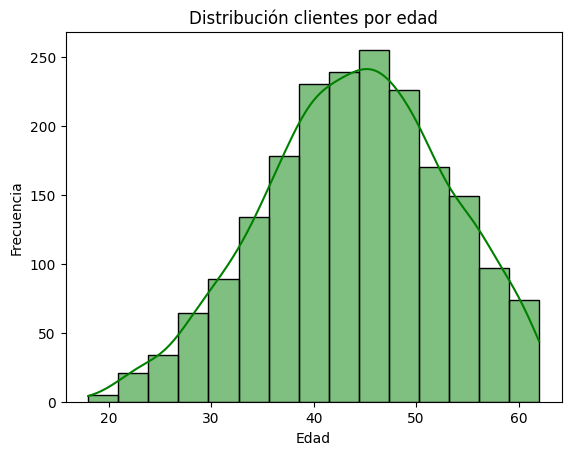

In [126]:
ax01 = sns.histplot(dataset_churn.Age, bins=15, color='Green', kde=True)

ax01.set_title('Distribución clientes por edad')
ax01.set_xlabel('Edad')
ax01.set_ylabel('Frecuencia')


plt.show()


✔ Dando respuesta a una de nuestras preguntas de interés planteadas al inicio de nuestro análisis, podemos observar que la edad promedio en la cual una persona abandona su banco ronda los 44 años.

---

Analicemos ahora ese mismo dato, pero teniendo en cuenta el género de nuestros clientes:

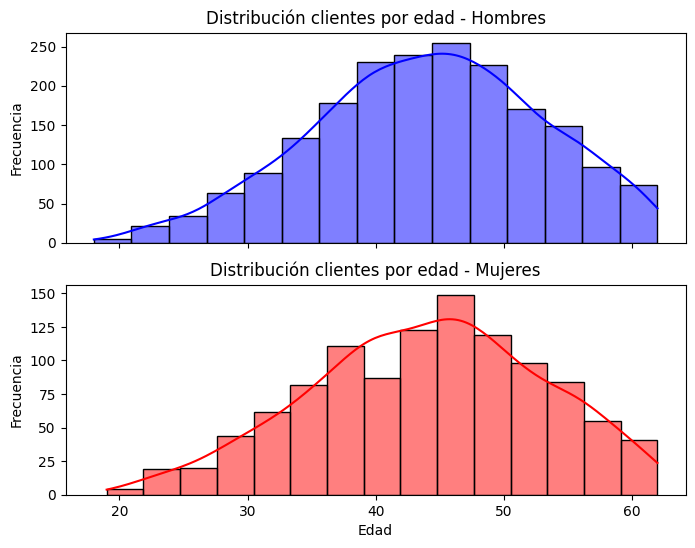

In [125]:
fig, ax = plt.subplots(2,1, figsize=(8,6), sharex=True)

ax01 = sns.histplot(dataset_churn.Age, bins=15, color='Blue', kde=True, ax=ax[0])
ax02 = sns.histplot(dataset_churn.Age[dataset_churn.Gender == 'Female'], bins=15, color='Red', kde=True, ax=ax[1])

ax01.set_title('Distribución clientes por edad - Hombres')
ax01.set_ylabel('Frecuencia')

ax02.set_title('Distribución clientes por edad - Mujeres')
ax02.set_xlabel('Edad')
ax02.set_ylabel('Frecuencia')


plt.show()


In [115]:
edad_media_churn_f = round(dataset_churn.Age[dataset_churn.Gender == 'Female'].mean())
edad_mediana_churn_f = round(dataset_churn.Age[dataset_churn.Gender == 'Female'].median())
edad_moda_churn_f = dataset_churn.Age[dataset_churn.Gender == 'Female'].mode()

print(f'La edad promedio de las mujeres que han abandonado su banco es de: {edad_media_churn_f} años')
print(f'La edad mediana de las mujeres que han abandonado su banco es de: {edad_mediana_churn_f} años')
print(f'La edad que más se repite es de: {edad_moda_churn_f[0]} años')


print('\n')

edad_media_churn_m = round(dataset_churn.Age[dataset_churn.Gender == 'Male'].mean())
edad_mediana_churn_m = round(dataset_churn.Age[dataset_churn.Gender == 'Male'].median())
edad_moda_churn_m = dataset_churn.Age[dataset_churn.Gender == 'Male'].mode()

print(f'La edad promedio de los hombres que han abandonado su banco es de: {edad_media_churn_m} años')
print(f'La edad mediana de los hombres que han abandonado su banco es de: {edad_mediana_churn_m} años')
print(f'La edad que más se repite es de: {edad_moda_churn_m[0]} años')

La edad promedio de las mujeres que han abandonado su banco es de: 44 años
La edad mediana de las mujeres que han abandonado su banco es de: 44 años
La edad que más se repite es de: 45 años


La edad promedio de los hombres que han abandonado su banco es de: 44 años
La edad mediana de los hombres que han abandonado su banco es de: 44 años
La edad que más se repite es de: 43 años


Como hemos comprobado, la edad de hombres y mujeres a la hora de abandonar su banco es muy similar en su comparativa. En un principio, la edad promedio de ambos es la misma para ambos géneros.


---

❗Partiendo de la hipótesis que hemos planteado a partir de los datos que acabamos de obtener, intentaremos demostrarlo con la aplicación de una prueba

In [129]:
from scipy.stats import ttest_ind

In [131]:
stat, p_value = ttest_ind(dataset_churn.Age[dataset_churn.Gender == 'Female'], dataset_churn.Age[dataset_churn.Gender == 'Male'])

print("Estadístico t:\t", round(stat, 4))
print("p-value:\t", round(p_value, 4))

if p_value < 0.05:
    print("➡️ Rechazamos la hipótesis nula: hay diferencia significativa en los promedios.")
else:
    print("✅ No se rechaza la hipótesis nula: no hay diferencia significativa.")

Estadístico t:	 -0.4571
p-value:	 0.6477
✅ No se rechaza la hipótesis nula: no hay diferencia significativa.
